In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [41]:
df = pd.DataFrame({
    'Experience_Years': [1,2,3,4,5,6,7,8,9,10],
    'Salary':           [30,35,38,45,50,55,60,66,72,80]
})

In [42]:
df.head()

,Experience_Years,Salary
0,1,30
1,2,35
2,3,38
3,4,45
4,5,50


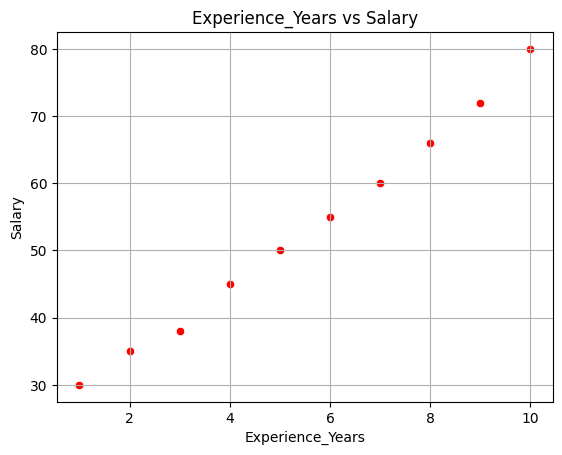

In [43]:
sns.scatterplot(data=df, x ='Experience_Years', y='Salary', color='red')
plt.grid()
plt.title('Experience_Years vs Salary')
plt.show()
plt.close()

#As Experience_Years increases, Salary also increases. Hence, there is a positive correlation between Experience_Years and Salary.

In [44]:
X = df[['Experience_Years']]
y = df['Salary']

In [52]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
df['Errors'] = y - y_pred

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 23.13333333333334
Coefficient: [5.44848485]


<Axes: xlabel='Experience_Years', ylabel='Errors'>

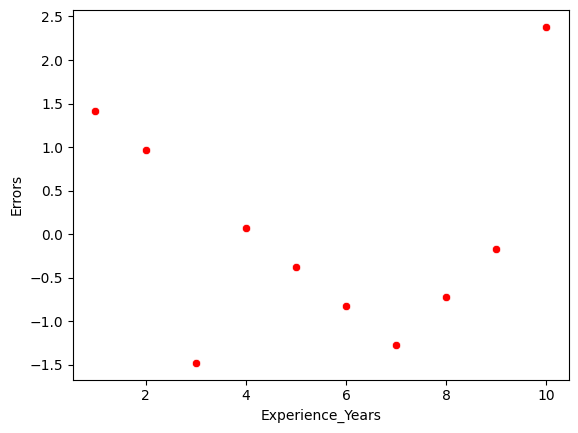

In [51]:
sns.scatterplot(data=df, x = 'Experience_Years', y=df['Errors'], color='red')

In [49]:
# Using statsmodels to get a detailed summary
import statsmodels.formula.api as sm
df4 = df.copy()
df4.rename(columns={'Experience_Years' : 'X', 'Salary': 'Y'}, inplace=True)
formula_str='Y ~ X'

result = sm.ols(formula = formula_str, data = df4).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           2.71e-10
Time:                        01:45:04   Log-Likelihood:                -15.802
No. Observations:                  10   AIC:                             35.60
Df Residuals:                       8   BIC:                             36.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1333      0.897     25.778      0.0